In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
train_data=pd.read_excel('F:\project of multiple ml algo\Flight_price\Data_Train.xlsx')

In [3]:
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.dropna(inplace=True)

In [6]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [8]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
for i in [ 'Date_of_Journey','Dep_Time', 'Arrival_Time']:
           change_into_datetime(i)


In [10]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-09-16 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-16 05:50:00,2021-09-16 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-09-16 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-09-16 18:05:00,2021-09-16 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-09-16 16:50:00,2021-09-16 21:35:00,4h 45m,1 stop,No info,13302


In [12]:
train_data['day']= train_data['Date_of_Journey'].dt.day
train_data['month']= train_data['Date_of_Journey'].dt.month
train_data['year']= train_data['Date_of_Journey'].dt.year

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-09-16 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-16 05:50:00,2021-09-16 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-09-16 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-09-16 18:05:00,2021-09-16 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-09-16 16:50:00,2021-09-16 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [14]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-09-16 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-16 05:50:00,2021-09-16 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-09-16 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-09-16 18:05:00,2021-09-16 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-09-16 16:50:00,2021-09-16 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [16]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
    
    
def extract_mint(df,col):
    df[col+'_mint']=df[col].dt.minute
    
    
   
    

In [17]:
extract_hour(train_data,'Dep_Time')
extract_hour(train_data,'Arrival_Time')
extract_mint(train_data,'Dep_Time')
extract_mint(train_data,'Arrival_Time')

In [18]:
train_data.drop('Dep_Time',axis=1,inplace=True)
train_data.drop('Arrival_Time',axis=1,inplace=True)

In [19]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Time_hour,Arrival_Time_hour,Dep_Time_mint,Arrival_Time_mint
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,4,25,25


In [20]:
duration= list(train_data['Duration'])


In [21]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]= duration[i] +' 0m'
        else:
            duration[i] = '0h '+ duration[i]
             # '0h' + ' ' + duration[i]

In [22]:
train_data['Duration'] = duration

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Time_hour,Arrival_Time_hour,Dep_Time_mint,Arrival_Time_mint
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,21,50,35


In [24]:
def hour(x):
    return x.split(' ')[0][0:-1]

def mint(x):
    return x.split(' ')[1][0:-1]


In [25]:
train_data.dtypes
train_data.isna().sum()

Airline              0
Source               0
Destination          0
Route                0
Duration             0
Total_Stops          0
Additional_Info      0
Price                0
day                  0
month                0
year                 0
Dep_Time_hour        0
Arrival_Time_hour    0
Dep_Time_mint        0
Arrival_Time_mint    0
dtype: int64

In [26]:
train_data['Duration_hour']=train_data['Duration'].apply(hour)
train_data['Duration_mint']=train_data['Duration'].apply(mint)


In [27]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Time_hour,Arrival_Time_hour,Dep_Time_mint,Arrival_Time_mint,Duration_hour,Duration_mint
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,21,50,35,4,45


In [28]:
train_data.drop('Duration',axis=1,inplace=True)

In [29]:
train_data.head(100)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,year,Dep_Time_hour,Arrival_Time_hour,Dep_Time_mint,Arrival_Time_mint,Duration_hour,Duration_mint
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,21,50,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,IndiGo,Chennai,Kolkata,MAA → CCU,non-stop,No info,3540,21,6,2019,5,7,15,40,2,25
96,SpiceJet,Banglore,Delhi,BLR → DEL,non-stop,No check-in baggage included,3257,15,5,2019,5,8,55,35,2,40
97,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,In-flight meal not included,6478,6,3,2019,19,22,50,50,3,0
98,Jet Airways,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,8040,18,6,2019,7,8,5,30,1,25


In [30]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
day                   int64
month                 int64
year                  int64
Dep_Time_hour         int64
Arrival_Time_hour     int64
Dep_Time_mint         int64
Arrival_Time_mint     int64
Duration_hour        object
Duration_mint        object
dtype: object

In [31]:
train_data['Duration_hour']=train_data['Duration_hour'].astype(int)
train_data['Duration_mint']=train_data['Duration_mint'].astype(int)                              

In [32]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
day                   int64
month                 int64
year                  int64
Dep_Time_hour         int64
Arrival_Time_hour     int64
Dep_Time_mint         int64
Arrival_Time_mint     int64
Duration_hour         int32
Duration_mint         int32
dtype: object

In [33]:
cat_col =  [col for col in train_data.columns if train_data[col].dtype=='O']

In [34]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [35]:
   cont_col=[col for col in train_data.columns if train_data[col].dtype!='O']
   cont_col


['Price',
 'day',
 'month',
 'year',
 'Dep_Time_hour',
 'Arrival_Time_hour',
 'Dep_Time_mint',
 'Arrival_Time_mint',
 'Duration_hour',
 'Duration_mint']

In [36]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,year,Dep_Time_hour,Arrival_Time_hour,Dep_Time_mint,Arrival_Time_mint,Duration_hour,Duration_mint
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,21,50,35,4,45


In [37]:
## nominal Data--- we have to perform one hot encoding
## original Data --- we have to perform label enccoder


In [38]:
categorical= train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [39]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [40]:
## to find distribution

In [41]:
## to find distribution

<AxesSubplot:xlabel='Airline', ylabel='Price'>

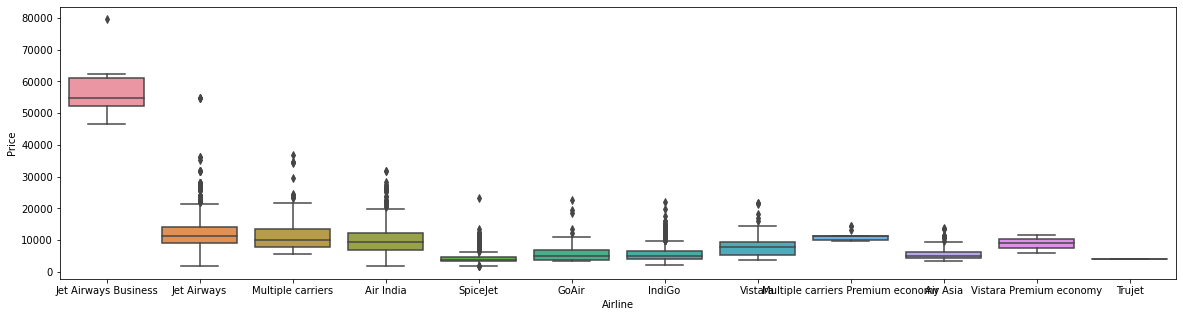

In [42]:
plt.figure(figsize=(20,5))

sns.boxplot(x='Airline',y='Price',data= train_data.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

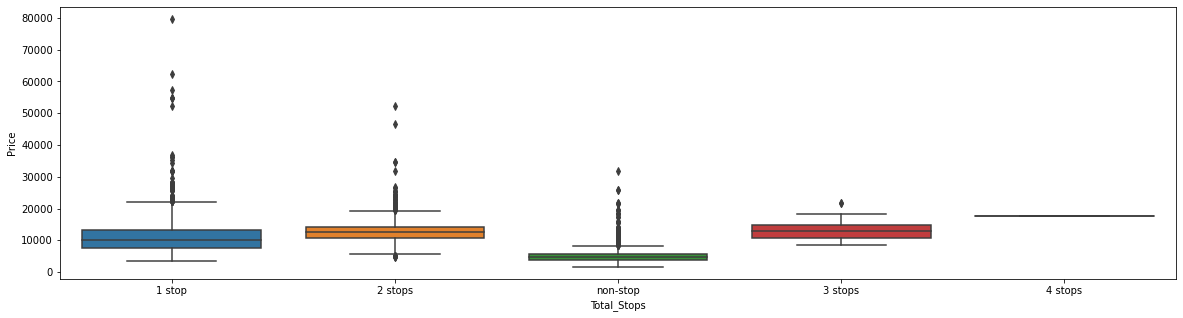

In [43]:
plt.figure(figsize=(20,5))

sns.boxplot(x='Total_Stops',y='Price',data= train_data.sort_values('Price',ascending=False))

In [44]:
# convert airline feature to integer so we use one hot encoding

In [45]:
Airline= pd.get_dummies(categorical['Airline'],drop_first=(True))

In [46]:
Airline.head(100)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,1,0,0,0
97,0,0,0,1,0,0,0,0,0,0,0
98,0,0,0,1,0,0,0,0,0,0,0


In [47]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

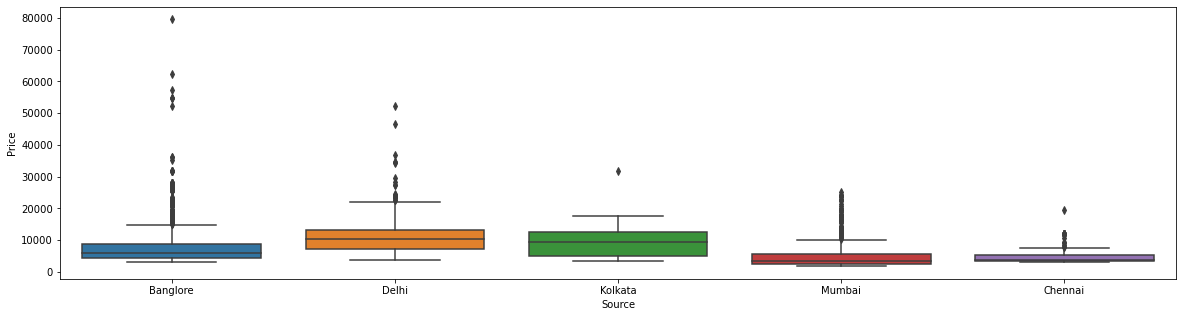

In [48]:
plt.figure(figsize=(20,5))

sns.boxplot(x='Source',y='Price',data= train_data.sort_values('Price',ascending=False))

In [49]:
## dummifiy the souce column

In [50]:
Source = pd.get_dummies(categorical['Source'],drop_first=(True))

In [51]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [52]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

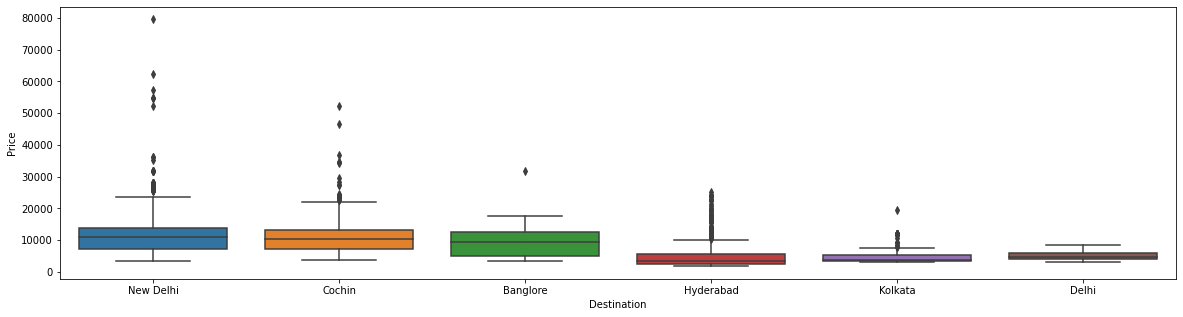

In [53]:
plt.figure(figsize=(20,5))

sns.boxplot(x='Destination',y='Price',data= train_data.sort_values('Price',ascending=False))

In [54]:
Destination = pd.get_dummies(categorical['Destination'],drop_first=(True))

In [55]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [56]:
## now we will deal with route

In [57]:
categorical['route_1']=categorical['Route'].str.split('→').str[0]
categorical['route_2']=categorical['Route'].str.split('→').str[1]
categorical['route_3']=categorical['Route'].str.split('→').str[2]
categorical['route_4']=categorical['Route'].str.split('→').str[3]
categorical['route_5']=categorical['Route'].str.split('→').str[4]

<ipython-input-57-ef593bc94ff3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['route_1']=categorical['Route'].str.split('→').str[0]
<ipython-input-57-ef593bc94ff3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['route_2']=categorical['Route'].str.split('→').str[1]
<ipython-input-57-ef593bc94ff3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [58]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [59]:
categorical.drop('Route',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [61]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
route_1                0
route_2                0
route_3             3491
route_4             9116
route_5            10636
dtype: int64

In [62]:
## null value replace by none
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'route_1', 'route_2', 'route_3', 'route_4', 'route_5'],
      dtype='object')

In [63]:
for i in ['route_3', 'route_4', 'route_5']:
    categorical[i].fillna('None',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [64]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
route_1            0
route_2            0
route_3            0
route_4            0
route_5            0
dtype: int64

In [65]:
categorical

,Airline,Source,Destination,Total_Stops,Additional_Info,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,CCU,BLR,None,None,None
10679,Air India,Kolkata,Banglore,non-stop,No info,CCU,BLR,None,None,None
10680,Jet Airways,Banglore,Delhi,non-stop,No info,BLR,DEL,None,None,None
10681,Vistara,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None


In [66]:
for i in categorical.columns:
    print(len(categorical[i].value_counts()))

12
5
6
5
10
5
45
30
14
6


In [67]:
for i in categorical.columns:
    print('{}has total {} categories'.format(i,len(categorical[i].value_counts())))


Airlinehas total 12 categories
Sourcehas total 5 categories
Destinationhas total 6 categories
Total_Stopshas total 5 categories
Additional_Infohas total 10 categories
route_1has total 5 categories
route_2has total 45 categories
route_3has total 30 categories
route_4has total 14 categories
route_5has total 6 categories


In [68]:
##route_2,3,4
## it do probllem if we do one hot encoding


In [69]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [70]:
for i in['route_1', 'route_2', 'route_3', 'route_4', 'route_5']:
    categorical[i]= encoder.fit_transform(categorical[i])
    

<ipython-input-70-5fc318f775b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]= encoder.fit_transform(categorical[i])


In [71]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [72]:
categorical.drop('Additional_Info',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
categorical

,Airline,Source,Destination,Total_Stops,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,0,13,29,13,5


In [74]:
dict={'non-stop':0,'1 stop': 1 ,'2 stops':2,'3 stops':3,'4 stops':4}

In [75]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

<ipython-input-75-e768699902ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [76]:
categorical.head(540)

,Airline,Source,Destination,Total_Stops,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...
535,Jet Airways,Kolkata,Banglore,1,2,7,3,13,5
536,Jet Airways,Banglore,New Delhi,1,0,7,8,13,5
537,SpiceJet,Chennai,Kolkata,0,4,8,29,13,5
538,Jet Airways,Banglore,Delhi,0,0,13,29,13,5


In [77]:
## concatenate all data frames airline soures and destination

In [78]:
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)  #  axis =1 means concatenate  in vertical fashion

In [79]:
data_train.head()

,Airline,Source,Destination,Total_Stops,route_1,route_2,route_3,route_4,route_5,Air India,...,Price,day,month,year,Dep_Time_hour,Arrival_Time_hour,Dep_Time_mint,Arrival_Time_mint,Duration_hour,Duration_mint
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,3897,24,3,2019,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,7662,5,1,2019,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,13882,6,9,2019,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,6218,5,12,2019,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,13302,3,1,2019,16,21,50,35,4,45


In [80]:
data_train.drop('Source',axis=1,inplace=True)
data_train.drop('Destination',axis=1,inplace=True)


data_train.drop('Airline',axis=1,inplace=True)

In [81]:
data_train.head()


,Total_Stops,route_1,route_2,route_3,route_4,route_5,Air India,GoAir,IndiGo,Jet Airways,...,Price,day,month,year,Dep_Time_hour,Arrival_Time_hour,Dep_Time_mint,Arrival_Time_mint,Duration_hour,Duration_mint
0,0,0,13,29,13,5,0,0,1,0,...,3897,24,3,2019,22,1,20,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,7662,5,1,2019,5,13,50,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,13882,6,9,2019,9,4,25,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,6218,5,12,2019,18,23,5,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,13302,3,1,2019,16,21,50,35,4,45


In [82]:
## to see all 36 columns


pd.set_option('display.max_columns',36)

In [83]:
data_train.head()

,Total_Stops,route_1,route_2,route_3,route_4,route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,day,month,year,Dep_Time_hour,Arrival_Time_hour,Dep_Time_mint,Arrival_Time_mint,Duration_hour,Duration_mint
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,2019,22,1,20,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,2019,5,13,50,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,2019,9,4,25,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,2019,18,23,5,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,2019,16,21,50,35,4,45


In [84]:
##  to handle outlier we have 2 main plots distribution and box plot approach

In [85]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


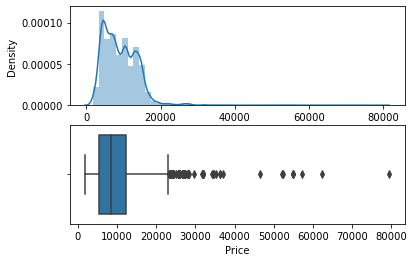

In [86]:

plot(data_train,'Price')

In [87]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


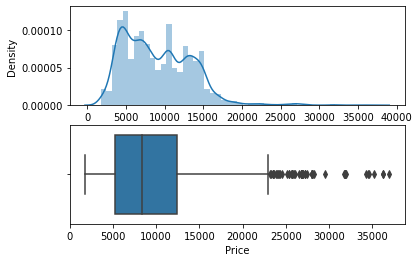

In [88]:
plot(data_train,'Price')

In [89]:
## seperate  independent and dependernt features

In [90]:
X=data_train.drop('Price',axis=1) # removing price feature becoz we have to pridict it  and more
                                 # over it is not a dependent feature

In [91]:
X.shape

(10682, 35)

In [92]:
y=data_train['Price']
y








0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [93]:
## now we do feature selection
## to know which are my good features
## we do this by information gain  33 we do feature selection becoz we dont want multiple dimension

In [94]:
from sklearn.feature_selection import mutual_info_classif

In [95]:
mutual_info_classif(X,y)

array([2.14589003e+00, 1.99838458e+00, 2.76821580e+00, 2.29454089e+00,
       1.42542658e+00, 7.07019822e-01, 7.56837417e-01, 9.90217348e-02,
       6.80629131e-01, 9.28416892e-01, 6.66187108e-03, 5.74037496e-01,
       1.61045064e-02, 3.19347899e-01, 1.52967042e-03, 2.25694023e-01,
       0.00000000e+00, 1.80591171e-01, 1.56685651e+00, 8.94349018e-01,
       3.06246361e-01, 1.51172712e+00, 3.98787755e-01, 3.02194509e-01,
       1.72097741e-01, 3.82996830e-01, 1.11655361e+00, 9.06731292e-01,
       1.43199062e+00, 1.41607150e+00, 1.84627540e+00, 1.23138893e+00,
       1.55991534e+00, 1.77935662e+00, 1.07180157e+00])

In [96]:
imp =pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.129112
route_1,2.050886
route_2,2.794184
route_3,2.274632
route_4,1.509178
route_5,0.733498
Air India,0.776459
GoAir,0.097908
IndiGo,0.656773
Jet Airways,0.910611


In [97]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
route_2,2.794184
route_3,2.274632
Total_Stops,2.129112
route_1,2.050886
Arrival_Time_hour,1.842001
Duration_hour,1.775703
Cochin,1.530634
Arrival_Time_mint,1.516493
Delhi,1.514263
route_4,1.509178


In [98]:
# top coloums are containing the maximum information we can skip Vistara Premium economy by talking to domain experties

In [99]:
print('apply machine learning ALGO on owe data and automate your prediction')

apply machine learning ALGO on owe data and automate your prediction


In [100]:
# split data for training and test data 7

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

In [103]:
from sklearn import metrics
import pickle 
def predict(ml_model, dump):
    model =ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)  #return y_prediction caught in y_prediction
    print('predictions are :\n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score is :{}'.format(r2_score))
    print('MAE is  :{}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
    print('MSE is  :{}'.format(metrics.mean_squared_error(y_test,y_prediction)))
    print('RMSE is  :{}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        file = open('F:\project of multiple ml algo\Flight_price/model.pkl',mode='wb')
        pickle.dump(model,file)

In [104]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.952899605897604
predictions are :
 [ 8454.83        5400.45        6045.74       ...  7511.85
  3925.62033333 26813.25      ]


r2 score is :0.8262502847918942
MAE is  :1103.5099584348736
MSE is  :3418188.146685543
RMSE is  :1848.834266960006


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


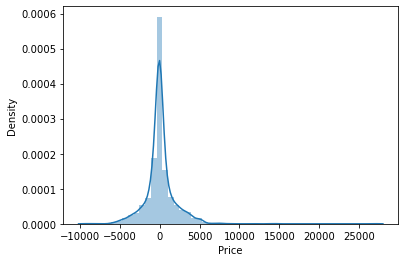

In [105]:
predict(RandomForestRegressor(),1)

In [106]:
## dump our model becoz we dont want to train our model again again and save our model somewhere so we can use it again
## so load that model using that pickel module of python  WE HAVE TO OPEN A FILE FOR DUMPING, DUMPING OF MODEL IN FILE

###                    

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training score : 0.6117682456349676
predictions are :
 [10580.64227581  9666.85577156  7911.71738722 ...  9063.78223136
  3869.42670523 15364.84238182]


r2 score is :0.6309266558272126
MAE is  :1895.6605523279761
MSE is  :7260801.140295403
RMSE is  :2694.587378485879


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


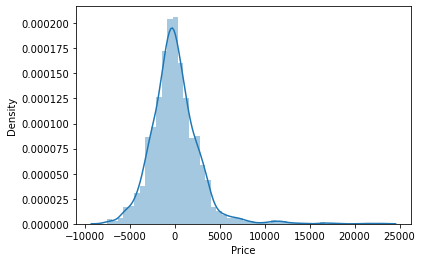

In [108]:
predict(LinearRegression(),1)

Training score : 0.966245161941399
predictions are :
 [ 8452.  8033.  6069. ...  7480.  3841. 26890.]


r2 score is :0.7275923688828569
MAE is  :1299.6503119638123
MSE is  :5359091.004184084
RMSE is  :2314.971059038122


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


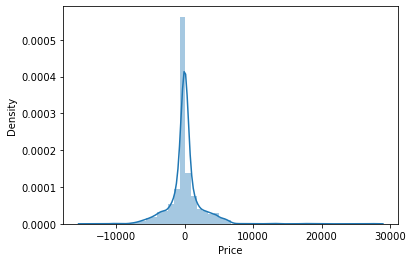

In [109]:
predict(DecisionTreeRegressor(),1)

Training score : 0.9526434546940005
predictions are :
 [ 8372.23        5329.47285714  6058.3        ...  7553.29
  3899.01233333 26684.2       ]


r2 score is :0.8239989714255895
MAE is  :1109.6376012427231
MSE is  :3462478.3641052404
RMSE is  :1860.7735929191495


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


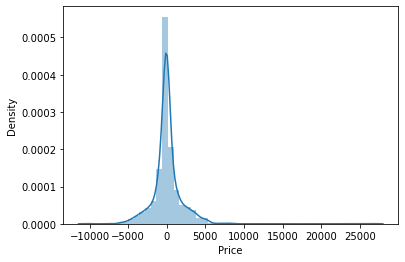

In [110]:
predict(RandomForestRegressor(),1)

Training score : 0.7787617408453347
predictions are :
 [ 8683.   6966.  10978.8 ... 12276.2  3853.8 13832.4]


r2 score is :0.6723263191596061
MAE is  :1647.9262517547963
MSE is  :6446343.180982687
RMSE is  :2538.9649822285237


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


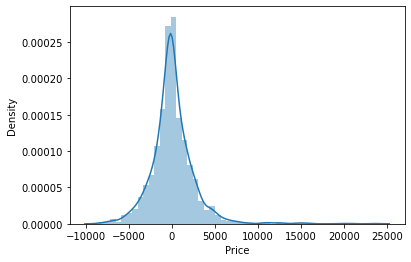

In [111]:
predict(KNeighborsRegressor(),1)

In [112]:
# now we do hyper tunning because decision tree and all differetnt
# algo runs with default parameter so we dont want that and may not be  the best use case

# # hyper parameter tunning for finding the best accuracy(randomize cs and grid search cv)

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
reg_rf = RandomForestRegressor()

In [121]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
  #RandomizedSearchCV()## estimator is the object of machne learning algorithm, param_distributions we have  to pass dict 

In [123]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

In [124]:
random_grid={
    'n_estimators': n_estimators,    ## no. of decision trees
    'max_features': ['auto','sqrt'],    ## maximum no. of features to consider at every split
    'max_depth': max_depth,                                       ##max no. of levels in decision tree  
    'min_samples_split':[5,10,15,100]
}

In [125]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [126]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)
#cv= 3 so 3 iteration
#verbose is for what ever activity is happening uder your cell
#n_jobs =-1  use all the resourses of cpu
#

In [127]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [128]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 30}

In [129]:
predictions= rf_random.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

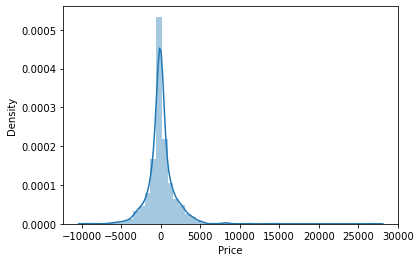

In [131]:
sns.distplot(y_test-predictions)

In [132]:
metrics.r2_score(y_test,predictions)

0.8453354864233726

In [140]:
file1= open ('F:\project of multiple ml algo\Flight_price/model.pkl1',mode='wb')

In [144]:
pickle.dump(rf_random,file1)

In [145]:
model =open('F:\project of multiple ml algo\Flight_price/model.pkl1',mode='rb')
forest = pickle.load(model)  # we have to storethis model to access it

In [146]:
# now do prediction based on this model so we do the following

In [149]:
predictions2=forest.predict(X_test)

In [152]:
metrics.r2_score(y_test,predictions2)   ## same to previous accuracy

0.8453354864233726